In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from scipy import stats
import os
import numpy as np
import glob

In [2]:
path = r'C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data'

In [3]:
AllData = pd.read_csv(path + "\\" + 'AllLight_AllMoths.csv')
AllData.head()

,Unnamed: 0,Unnamed: 0.1,In_Frame,Out_Frame,Proboscis,DiscoveryTime,trialNum,name
0,0,0,56168,57499,NaN,NaN,0,L0.1_c-3_m32
1,1,1,64538,65181,64946.0,408.0,1,L0.1_c-3_m32
2,2,2,65795,66238,66026.0,231.0,2,L0.1_c-3_m32
3,3,3,66351,72160,66353.0,2.0,3,L0.1_c-3_m32
4,4,4,72303,73186,72599.0,296.0,4,L0.1_c-3_m32


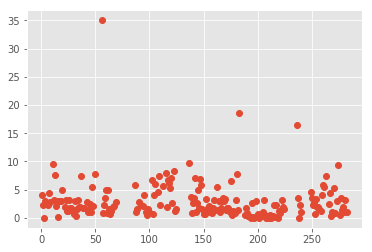

In [4]:
plt.plot(AllData.DiscoveryTime/100, 'o')

C:\Users\Daniellab\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Daniellab\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


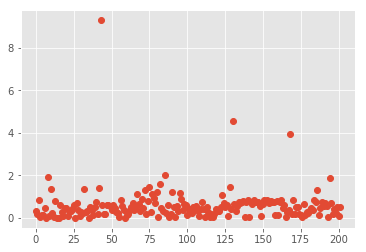

In [5]:
AllData_notnull = AllData[AllData.DiscoveryTime.notnull()]
z = np.abs(stats.zscore(AllData_notnull.DiscoveryTime.values))
outlier_ID = z > 5
plt.plot(z, 'o') 

AllData_notnull['zscore'] = z
AllData_notnull['outlier_ID'] = outlier_ID

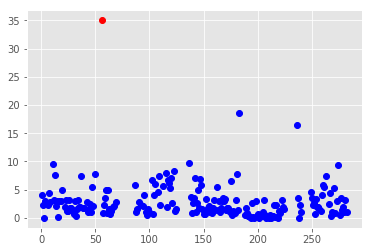

In [6]:
plt.plot(AllData_notnull.DiscoveryTime[AllData_notnull.outlier_ID == True]/100, 'o', color = 'red')
plt.plot(AllData_notnull.DiscoveryTime[AllData_notnull.outlier_ID == False]/100, 'o', color = 'blue')

C:\Users\Daniellab\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


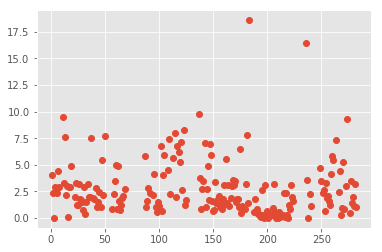

In [7]:
notoutliers = AllData_notnull[AllData_notnull.outlier_ID == False]
notoutliers['DiscoveryTime'] = notoutliers.DiscoveryTime.div(100, axis = 'index')
plt.plot(notoutliers['DiscoveryTime'], 'o')

Text(0.5, 0, 'Occurance')

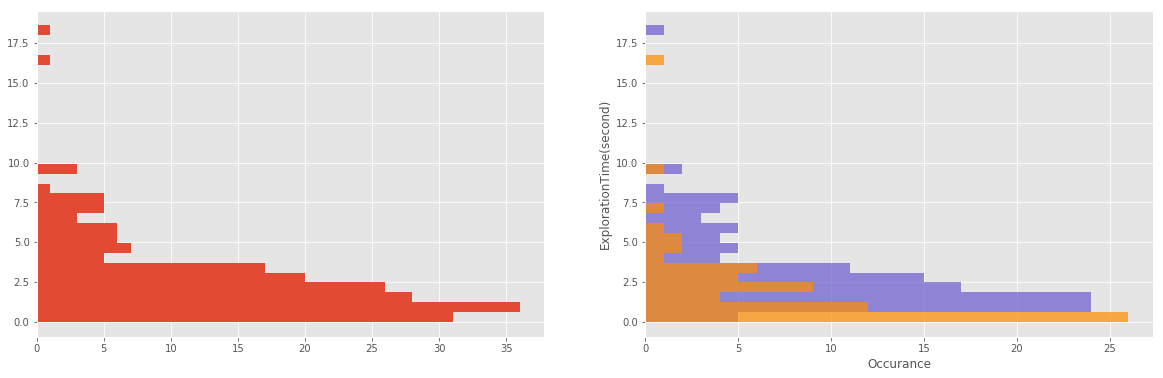

In [8]:
hist, bins = np.histogram(notoutliers.DiscoveryTime.values, bins = 30)

fig, ax = plt.subplots(1,2, figsize = (20,6))
ax = ax.ravel()

ax[0].hist(notoutliers.DiscoveryTime.values, bins, histtype = 'bar', orientation='horizontal')
ax[1].hist(notoutliers.DiscoveryTime[notoutliers.name.str.contains('L0.1_')].values, bins, 
          orientation='horizontal', alpha = 0.7, color = 'slateblue')
ax[1].hist(notoutliers.DiscoveryTime[notoutliers.name.str.contains('L50_')].values, bins, 
          orientation='horizontal', alpha = 0.7, color = 'darkorange')
ax[1].set_ylabel('ExplorationTime(second)')
ax[1].set_xlabel('Occurance')

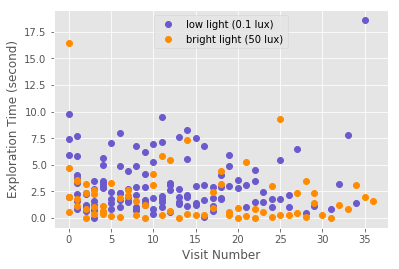

In [9]:
plt.plot(notoutliers[notoutliers.name.str.contains('L0.1')].trialNum, 
         notoutliers[notoutliers.name.str.contains('L0.1')].DiscoveryTime,
         'o', color = 'slateblue', label = 'low light (0.1 lux)')
plt.plot(notoutliers[notoutliers.name.str.contains('L50')].trialNum, 
         notoutliers[notoutliers.name.str.contains('L50')].DiscoveryTime, 
         'o', color = 'darkorange', label = 'bright light (50 lux)')
plt.ylabel('Exploration Time (second)')
plt.xlabel('Visit Number')
plt.legend()

# add exponential curves - color: L50 - chocolate or saddle brown, L0.1 - darkslateblue, or blue violet

In [10]:
# BinnedDataSet
# binsize = 10
# new_column = binLabel 

notoutliers['binLabel'] = ['0-9' if value <= 9 
                           else ('10-19' if (value > 9) & (value <= 19) else '20andAbove') 
                           for value in notoutliers['trialNum']]

notoutliers['lightLevel'] = ['low' if 'L0.1' in value 
                           else 'high' for value in notoutliers['name']]

notoutliers.head()

C:\Users\Daniellab\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Daniellab\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,Unnamed: 0,Unnamed: 0.1,In_Frame,Out_Frame,Proboscis,DiscoveryTime,trialNum,name,zscore,outlier_ID,binLabel,lightLevel
1,1,1,64538,65181,64946.0,4.08,1,L0.1_c-3_m32,0.348188,False,0-9,low
2,2,2,65795,66238,66026.0,2.31,2,L0.1_c-3_m32,0.163869,False,0-9,low
3,3,3,66351,72160,66353.0,0.02,3,L0.1_c-3_m32,0.826360,False,0-9,low
4,4,4,72303,73186,72599.0,2.96,4,L0.1_c-3_m32,0.024175,False,0-9,low
5,5,5,78687,80843,78929.0,2.42,5,L0.1_c-3_m32,0.132046,False,0-9,low


In [11]:
notoutliers.binLabel.unique()

array(['0-9', '10-19', '20andAbove'], dtype=object)

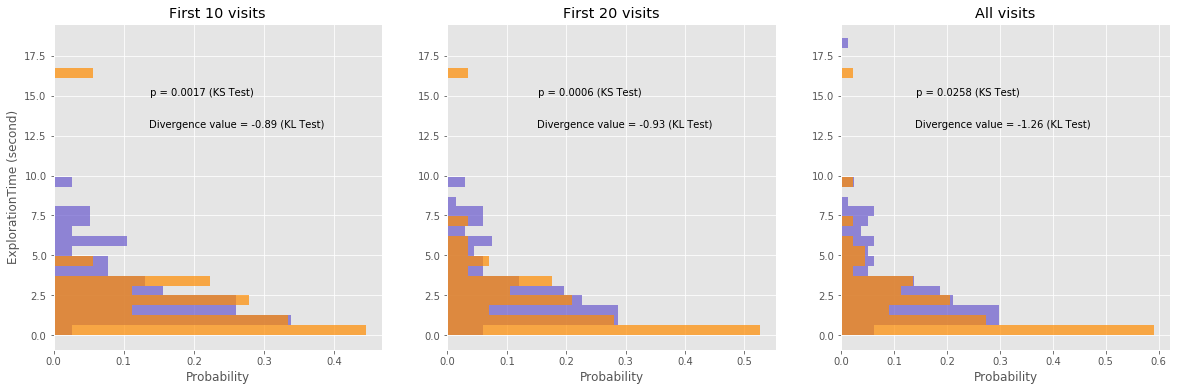

In [23]:
fig, ax = plt.subplots(1,3, figsize = (20,6))
ax = ax.ravel()

hist_10_lowlight, _, _ = ax[0].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
                                     (notoutliers.binLabel == '0-9')].values,
           bins, orientation='horizontal', alpha = 0.7, color = 'slateblue', density = True)
hist_10_Highlight, _, _ = ax[0].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_')) & 
                                     (notoutliers.binLabel == '0-9')].values, 
           bins, orientation='horizontal', alpha = 0.7, color = 'darkorange', density = True)
ax[0].set_title('First 10 visits')
ax[0].text(0.1335, 15, ' p = 0.0017 (KS Test)' )
ax[0].text(0.136, 13, 'Divergence value = -0.89 (KL Test)')
hist_20_lowlight, _, _ = ax[1].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
                                     (notoutliers.binLabel != '20andAbove')].values,
           bins, orientation='horizontal', alpha = 0.7, color = 'slateblue', density = True)
hist_20_highlight, _, _ = ax[1].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_')) & 
                                     (notoutliers.binLabel != '20andAbove')].values, 
           bins, orientation='horizontal', alpha = 0.7, color = 'darkorange', density = True)
ax[1].set_title('First 20 visits')
ax[1].text(0.147, 15, ' p = 0.0006 (KS Test)' )
ax[1].text(0.15, 13, 'Divergence value = -0.93 (KL Test)')

hist_all_lowlight,_, _ = ax[2].hist(notoutliers.DiscoveryTime[notoutliers.name.str.contains('L0.1_')].values, bins, 
          orientation='horizontal', alpha = 0.7, color = 'slateblue', density = True)
hist_all_highlight, _, _ =ax[2].hist(notoutliers.DiscoveryTime[notoutliers.name.str.contains('L50_')].values, bins, 
          orientation='horizontal', alpha = 0.7, color = 'darkorange', density = True)
ax[2].set_title('All visits')
ax[2].text(0.136, 15, ' p = 0.0258 (KS Test)'  )
ax[2].text(0.14, 13, 'Divergence value = -1.26 (KL Test)')


ax[0].set_ylabel('ExplorationTime (second)')
ax[0].set_xlabel('Probability')
ax[1].set_xlabel('Probability')
ax[2].set_xlabel('Probability')
outpath_figg = r'C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Stats'
plt.savefig(outpath_figg + "\\" + 'Stats_Plot_second_set.png')

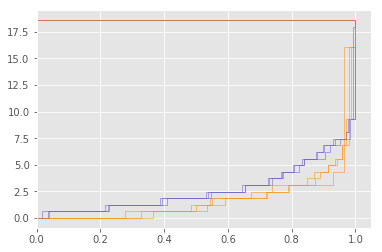

In [13]:
hist_20_lowlight, _, _ = plt.hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
                                     (notoutliers.binLabel != '20andAbove')].values,
        bins, density=True, histtype='step', color = 'slateblue',
        cumulative=True, label='lowLight', orientation = 'horizontal')

hist_20_highlight, _, _ = plt.hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_')) & 
                                     (notoutliers.binLabel != '20andAbove')].values,
        bins, density=True, histtype='step', color = 'darkorange',
        cumulative=True, label='highLight', orientation = 'horizontal')


hist_10_lowlight, _, _ = plt.hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
                                     (notoutliers.binLabel == '0-9')].values,
        bins, density=True, histtype='step', color = 'slateblue',
        cumulative=True, label='lowLight', orientation = 'horizontal')

hist_10_highlight, _, _ = plt.hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_')) & 
                                     (notoutliers.binLabel == '0-9')].values,
        bins, density=True, histtype='step', color = 'darkorange',
        cumulative=True, label='highLight', orientation = 'horizontal')

hist_all_lowlight, _, _ = plt.hist(notoutliers.DiscoveryTime[notoutliers.name.str.contains('L0.1_')].values,
        bins, density=True, histtype='step', color = 'slateblue',
        cumulative=True, label='lowLight', orientation = 'horizontal')

hist_all_highlight, _, _ = plt.hist(notoutliers.DiscoveryTime[notoutliers.name.str.contains('L50_')].values,
        bins, density=True, histtype='step', color = 'darkorange',
        cumulative=True, label='highLight', orientation = 'horizontal')

In [14]:
def KL(P,Q, epsilon):
# """ Epsilon is used here to avoid conditional code for
# checking that neither P nor Q is equal to 0. """
     epsilon = 1e-20
# You may want to instead make copies to avoid changing the np arrays.
     P = P+epsilon
     Q = Q+epsilon
     
     divergence = np.sum(P*np.log(P/Q))
      
     return divergence

In [15]:
KL(hist_10_lowlight, hist_10_highlight, 1e-30)

-0.8911274940534266

In [16]:
KL(hist_20_lowlight, hist_20_highlight, 1e-30)

-0.9350704739441567

In [17]:
KL(hist_all_lowlight, hist_all_highlight, 1e-30)

-1.2637111046191887

In [18]:
stats.ks_2samp(hist_10_highlight,hist_10_lowlight)

Ks_2sampResult(statistic=0.4666666666666667, pvalue=0.0017459498829507842)

In [19]:
stats.ks_2samp(hist_20_highlight,hist_20_lowlight)

Ks_2sampResult(statistic=0.5, pvalue=0.000615779027922126)

In [20]:
stats.ks_2samp(hist_all_highlight,hist_all_lowlight)

Ks_2sampResult(statistic=0.3666666666666667, pvalue=0.025856269697631676)

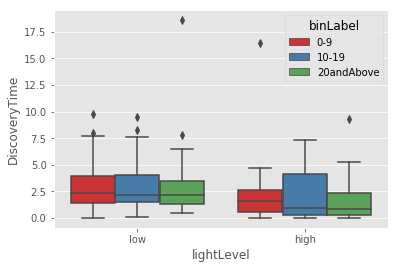

In [21]:
import seaborn as sns
df = sns.load_dataset('tips')
 
# Grouped boxplot
sns.boxplot(x="lightLevel", y="DiscoveryTime", hue="binLabel", data=notoutliers, palette="Set1")
# sns.plt.show()

In [22]:
notoutliers.to_csv(path + 'notoutliers.csv')